<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno3/scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Roll No: 24BAD094

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("auto-mpg.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.isnull().sum()

df.dropna(inplace=True)


In [5]:
X = df[['horsepower']]
y = df['mpg']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
degrees = [2, 3, 4]

results = {}

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[degree] = {"MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"\nDegree {degree}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)



Degree 2
MSE: 18.4169677960178
RMSE: 4.291499481069269
R2: 0.639170114701331

Degree 3
MSE: 18.460267222224637
RMSE: 4.29654130926547
R2: 0.6383217814053859

Degree 4
MSE: 18.268226874853195
RMSE: 4.27413463461941
R2: 0.6420842844016574


In [9]:
pd.DataFrame(results).T


,MSE,RMSE,R2
2,18.416968,4.291499,0.639170
3,18.460267,4.296541,0.638322
4,18.268227,4.274135,0.642084


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


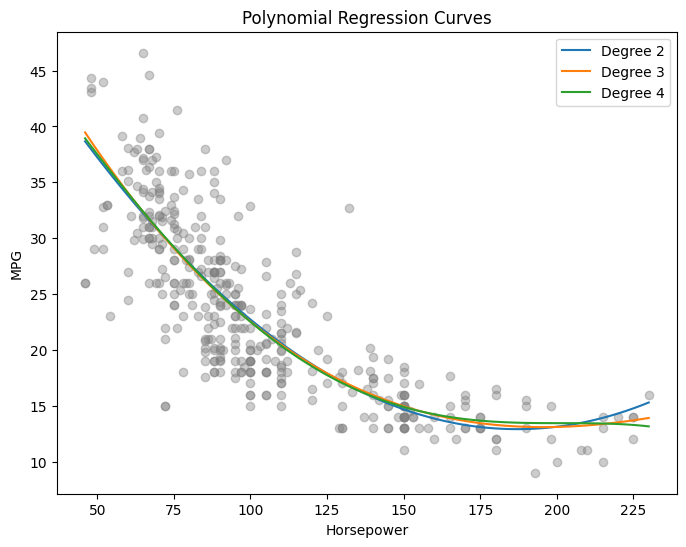

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(X, y, color='gray', alpha=0.4)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
x_range_scaled = scaler.transform(x_range)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_range_scaled)

    model = LinearRegression()
    model.fit(poly.fit_transform(X_train_scaled), y_train)

    y_curve = model.predict(x_poly)

    plt.plot(x_range, y_curve, label=f'Degree {degree}')

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curves")
plt.legend()
plt.show()


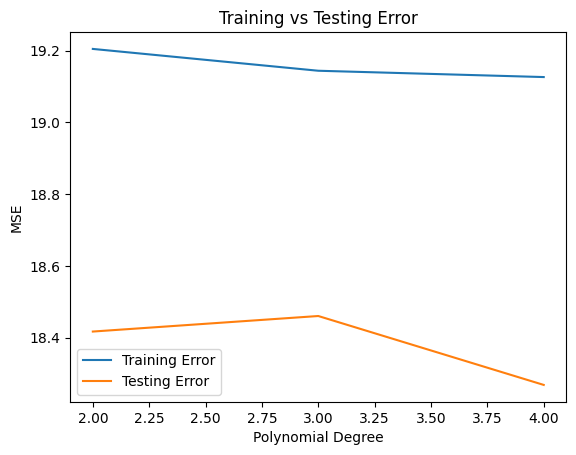

In [11]:
train_errors = []
test_errors = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()


In [12]:
ridge_results = {}

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_poly, y_train)

    y_pred = ridge.predict(X_test_poly)

    ridge_results[degree] = r2_score(y_test, y_pred)

pd.DataFrame(ridge_results, index=["R2 Score"])


,2,3,4
R2 Score,0.640182,0.639233,0.641325
